In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [9]:
forecast_weather = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_forecast_weather.csv')

In [10]:
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')

In [11]:
real_weather = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/weather_solar_actual.csv')

In [12]:
forecast_weather

,Forecast time,forecast,temperature,humidity,windspeed,winddirection
0,2020-09-01 11:00:00,4.0,31.0,65.0,3.0,101.0
1,2020-09-01 11:00:00,7.0,29.0,80.0,2.4,90.0
2,2020-09-01 11:00:00,10.0,26.0,90.0,1.7,65.0
3,2020-09-01 11:00:00,13.0,26.0,90.0,1.5,48.0
4,2020-09-01 11:00:00,16.0,25.0,90.0,1.6,40.0
...,...,...,...,...,...,...
230259,2022-07-01 08:00:00,60.0,26.0,80.0,2.5,78.0
230260,2022-07-01 08:00:00,61.0,26.0,85.0,2.1,76.0
230261,2022-07-01 08:00:00,62.0,25.0,85.0,1.7,65.0
230262,2022-07-01 08:00:00,63.0,25.0,85.0,1.6,43.0


In [13]:
forecast_weather['Forecast time'] = pd.to_datetime(forecast_weather['Forecast time'])

In [14]:
real_weather = real_weather.iloc[:,2:]

In [15]:
real_weather.columns = ['date','temp','wind_speed','wind_dir','humidity']

In [16]:
forecast_weather['real_time'] = ''

In [17]:
for i in range(len(forecast_weather)):
    forecast_weather['real_time'][i] = forecast_weather['Forecast time'][i] + datetime.timedelta(hours=forecast_weather['forecast'][i])

In [18]:
forecast_weather_eda = forecast_weather.groupby(['real_time']).mean().drop('forecast', axis=1)

In [19]:
from scipy import interpolate

In [20]:
forecast_weather_eda.reset_index(inplace=True)

In [21]:
forecast_weather_eda

,real_time,temperature,humidity,windspeed,winddirection
0,2020-09-01 15:00:00,31.0,65.000000,3.00,101.000000
1,2020-09-01 18:00:00,29.0,80.000000,2.40,90.000000
2,2020-09-01 21:00:00,26.0,90.000000,1.80,66.333333
3,2020-09-02 00:00:00,25.5,90.000000,1.75,48.000000
4,2020-09-02 03:00:00,25.0,90.000000,1.90,44.200000
...,...,...,...,...,...
11236,2022-07-03 20:00:00,26.0,80.000000,2.50,78.000000
11237,2022-07-03 21:00:00,26.0,81.666667,2.10,76.000000
11238,2022-07-03 22:00:00,25.0,85.000000,1.70,65.000000
11239,2022-07-03 23:00:00,25.0,85.000000,1.60,43.000000


In [22]:
forecast_weather_eda

,real_time,temperature,humidity,windspeed,winddirection
0,2020-09-01 15:00:00,31.0,65.000000,3.00,101.000000
1,2020-09-01 18:00:00,29.0,80.000000,2.40,90.000000
2,2020-09-01 21:00:00,26.0,90.000000,1.80,66.333333
3,2020-09-02 00:00:00,25.5,90.000000,1.75,48.000000
4,2020-09-02 03:00:00,25.0,90.000000,1.90,44.200000
...,...,...,...,...,...
11236,2022-07-03 20:00:00,26.0,80.000000,2.50,78.000000
11237,2022-07-03 21:00:00,26.0,81.666667,2.10,76.000000
11238,2022-07-03 22:00:00,25.0,85.000000,1.70,65.000000
11239,2022-07-03 23:00:00,25.0,85.000000,1.60,43.000000


In [23]:
forecast_weather

,Forecast time,forecast,temperature,humidity,windspeed,winddirection,real_time
0,2020-09-01 11:00:00,4.0,31.0,65.0,3.0,101.0,2020-09-01 15:00:00
1,2020-09-01 11:00:00,7.0,29.0,80.0,2.4,90.0,2020-09-01 18:00:00
2,2020-09-01 11:00:00,10.0,26.0,90.0,1.7,65.0,2020-09-01 21:00:00
3,2020-09-01 11:00:00,13.0,26.0,90.0,1.5,48.0,2020-09-02 00:00:00
4,2020-09-01 11:00:00,16.0,25.0,90.0,1.6,40.0,2020-09-02 03:00:00
...,...,...,...,...,...,...,...
230259,2022-07-01 08:00:00,60.0,26.0,80.0,2.5,78.0,2022-07-03 20:00:00
230260,2022-07-01 08:00:00,61.0,26.0,85.0,2.1,76.0,2022-07-03 21:00:00
230261,2022-07-01 08:00:00,62.0,25.0,85.0,1.7,65.0,2022-07-03 22:00:00
230262,2022-07-01 08:00:00,63.0,25.0,85.0,1.6,43.0,2022-07-03 23:00:00


In [24]:
solar['datetime'] = pd.to_datetime(solar['datetime'])

In [25]:
solar.target.replace(65535.0, solar.target.mean(), inplace=True)

In [26]:
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day

In [27]:
solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()

In [28]:
solar_eda[['year','month','day','hour']] = solar_eda[['year','month','day','hour']].astype('str')

In [29]:
solar_eda['date'] = (solar_eda.year + '-' + solar_eda.month + '-' + solar_eda.day + ' ' + solar_eda.hour + ':00')

In [30]:
solar_eda.date = pd.to_datetime(solar_eda.date)

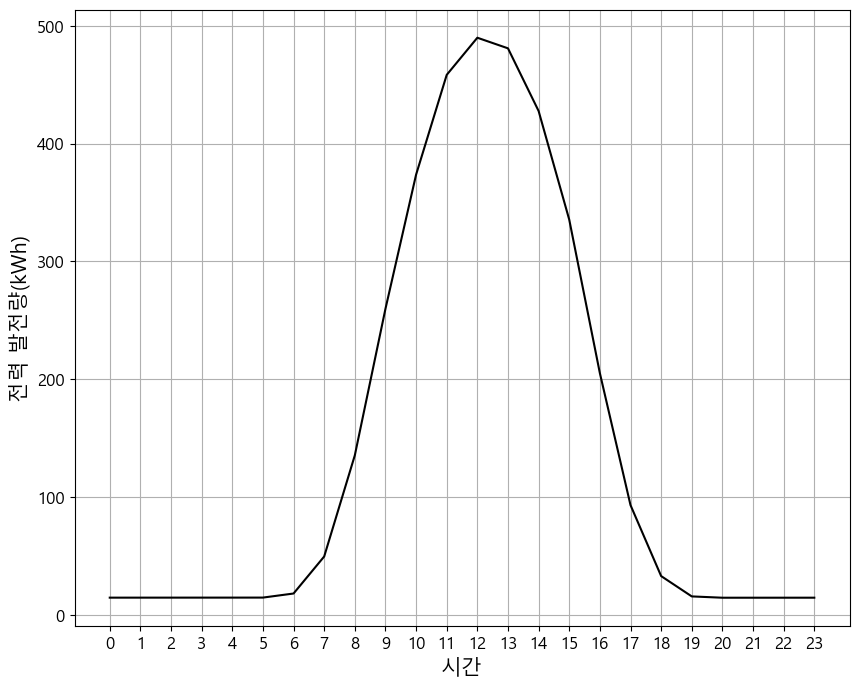

In [31]:
ee = solar.groupby(['hour']).mean().target
plt.figure(figsize=(10,8))
plt.plot(ee, color = 'k')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 발전량(kWh)', fontsize = 15)
plt.show()

In [32]:
solar_eda = solar_eda.set_index('date')

In [33]:
real_weather = real_weather.set_index('date')

In [34]:
forecast_weather_eda.set_index('real_time', inplace=True)

In [35]:
forecast_x = forecast_weather_eda.loc[solar_eda.index[0]:solar_eda.index[-1]]

In [36]:
real_weather.index = pd.to_datetime(real_weather.index)

In [37]:
real_x = real_weather.loc[solar_eda.index[0]:solar_eda.index[-1]]

In [38]:
solar_eda = solar_eda.fillna(0)

In [39]:
from sklearn.preprocessing import StandardScaler 

In [40]:
sc = StandardScaler()

In [41]:
solar_eda

,year,month,day,hour,target
date,,,,,
2020-09-10 00:00:00,2020,9,10,0,0.00
2020-09-10 01:00:00,2020,9,10,1,0.00
2020-09-10 02:00:00,2020,9,10,2,0.00
2020-09-10 03:00:00,2020,9,10,3,0.00
2020-09-10 04:00:00,2020,9,10,4,0.00
...,...,...,...,...,...
2022-04-30 19:00:00,2022,4,30,19,0.85
2022-04-30 20:00:00,2022,4,30,20,0.00
2022-04-30 21:00:00,2022,4,30,21,0.00


In [42]:
real_x = pd.DataFrame(sc.fit_transform(real_x), columns=['temp','wind_speed','wind_dir','humidity'])
solar_eda = pd.DataFrame(sc.fit_transform(solar_eda), columns = ['year','month','day','hour','target'])

In [242]:
real_x['hour'] = solar_eda.hour

In [43]:
y = solar_eda.target

In [243]:
train_x = real_x.iloc[:int(len(real_x)*0.9),:]
test_x = real_x.iloc[int(len(real_x)*0.9):,:]

In [244]:
train_y = y.iloc[:int(len(y)*0.9)]
test_y = y.iloc[int(len(y)*0.9):]

In [245]:
import pvlib
from pvlib import clearsky, atmosphere, solarposition
from pvlib.location import Location
from pvlib.iotools import read_tmy3

In [246]:
latitude = 37.456
longitude = 126.705

In [247]:
tus = Location(latitude, longitude, 'ROK')

In [248]:
time = pd.date_range(start=forecast_weather_eda.index.min(), end = forecast_weather_eda.index.max(), freq='H', tz = tus.tz)

In [249]:
cs = tus.get_clearsky(time)

In [250]:
cs

,ghi,dni,dhi
2020-09-01 15:00:00+09:00,672.205540,763.020810,126.066169
2020-09-01 16:00:00+09:00,509.779364,695.181238,111.699856
2020-09-01 17:00:00+09:00,313.589459,565.928253,89.242537
2020-09-01 18:00:00+09:00,109.238226,298.243072,49.738810
2020-09-01 19:00:00+09:00,0.010326,0.070536,0.010165
...,...,...,...
2022-07-03 20:00:00+09:00,0.000000,0.000000,0.000000
2022-07-03 21:00:00+09:00,0.000000,0.000000,0.000000
2022-07-03 22:00:00+09:00,0.000000,0.000000,0.000000
2022-07-03 23:00:00+09:00,0.000000,0.000000,0.000000


<AxesSubplot: >

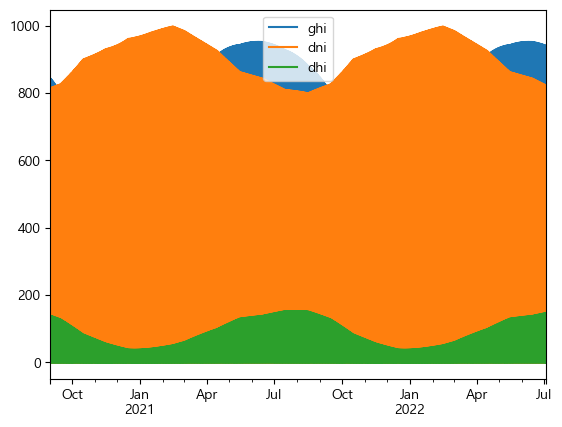

In [251]:
cs.plot()

<AxesSubplot: >

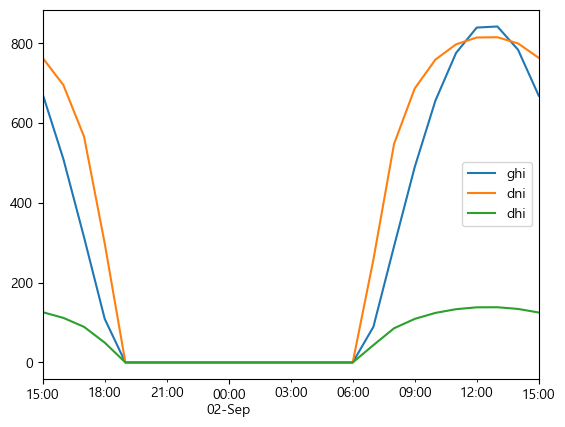

In [252]:
cs.iloc[:25,:].plot()

### DNI : Direct normal irradiance
### DHI : Diffuse horizontal irradiance
### GHI : Global solar radiation on a horizontal irradiance

---
# LSTM model

In [336]:
x_test = tf.convert_to_tensor(test_x.values, dtype=tf.float32)
x_train = tf.convert_to_tensor(train_x.values, dtype=tf.float32)

In [337]:
y_test = tf.convert_to_tensor(test_y.values, dtype=tf.float32)
y_train = tf.convert_to_tensor(train_y.values, dtype=tf.float32)

In [394]:
x_tr = tf.reshape(x_train, (-1, 1, 5))
y_tr = tf.reshape(y_train, (-1, 1, 1))

x_te = tf.reshape(x_test, (-1, 1, 5))

In [396]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(4, input_shape=(1,5), return_sequences=True))
model.add(tf.keras.layers.LSTM(16))
# model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))

In [397]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 1, 4)              160       
                                                                 
 lstm_61 (LSTM)              (None, 16)                1344      
                                                                 
 dense_28 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________


In [398]:
from keras import optimizers

In [413]:
adam = optimizers.Adam(lr=0.001)

In [414]:
model.compile(loss = 'mse', optimizer = adam)

In [415]:
his = model.fit(x_tr, y_tr, epochs=800)

Epoch 1/800
404/404 [==============================] - 4s 1ms/step - loss: 0.2250
Epoch 2/800
404/404 [==============================] - 1s 1ms/step - loss: 0.2230
Epoch 3/800
404/404 [==============================] - 1s 1ms/step - loss: 0.2224
Epoch 4/800
404/404 [==============================] - 1s 1ms/step - loss: 0.2224
Epoch 5/800
404/404 [==============================] - 1s 1ms/step - loss: 0.2222
Epoch 6/800
404/404 [==============================] - 1s 1ms/step - loss: 0.2223
Epoch 7/800
404/404 [==============================] - 1s 1ms/step - loss: 0.2223
Epoch 8/800
404/404 [==============================] - 1s 1ms/step - loss: 0.2221
Epoch 9/800
404/404 [==============================] - 1s 2ms/step - loss: 0.2221
Epoch 10/800
404/404 [==============================] - 1s 2ms/step - loss: 0.2222
Epoch 11/800
404/404 [==============================] - 1s 1ms/step - loss: 0.2219
Epoch 12/800
404/404 [==============================] - 1s 1ms/step - loss: 0.2223
Epoch 13/800


In [416]:
predict = model.predict(x_te)

45/45 [==============================] - 1s 740us/step


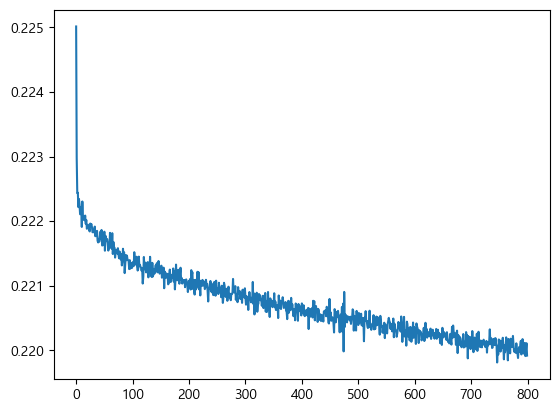

In [417]:
plt.plot(his.history['loss'])

In [418]:
from sklearn.metrics import mean_squared_error

In [419]:
y_test

<tf.Tensor: shape=(1436,), dtype=float32, numpy=
array([-0.6546344, -0.6546344, -0.6546344, ..., -0.6546344, -0.6546344,
       -0.6546344], dtype=float32)>

In [420]:
mean_squared_error(y_test, predict)

0.3779706

In [421]:
from sklearn.metrics import r2_score

In [422]:
r2_score(y_test, predict)

0.7137970299833291

In [423]:
predict.reshape(1,-1)

array([[-0.6194436 , -0.62526906, -0.64545304, ..., -0.49173826,
        -0.545223  , -0.59512776]], dtype=float32)

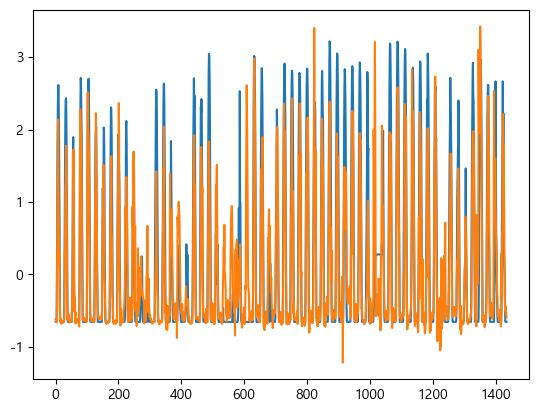

In [424]:
plt.plot(y_test)
plt.plot(predict)

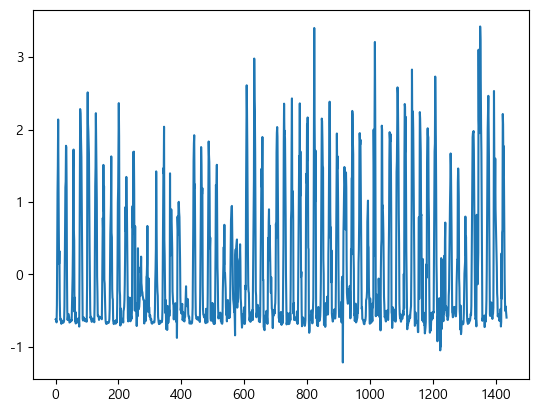

In [425]:
plt.plot(predict.reshape(-1,1))

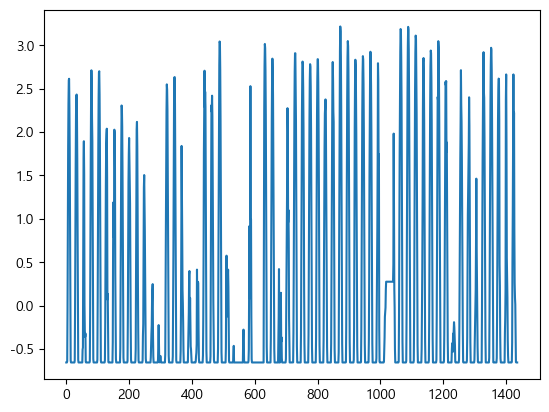

In [426]:
plt.plot(y_test)